In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
porto = pd.read_csv('train.csv')
porto.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
data = porto.drop(columns=['id', 'target'])
scaled_data = preprocessing.scale(data)

In [4]:
pca = PCA()
X = pca.fit_transform(scaled_data)

In [5]:
pca.explained_variance_ratio_ 

array([6.35706913e-02, 4.53867886e-02, 3.98399981e-02, 3.47869424e-02,
       3.26427052e-02, 3.07718008e-02, 2.79187742e-02, 2.42180734e-02,
       2.19915174e-02, 2.10882849e-02, 1.92106162e-02, 1.88428793e-02,
       1.78423590e-02, 1.77124027e-02, 1.76755363e-02, 1.76548273e-02,
       1.76435980e-02, 1.76208352e-02, 1.76087952e-02, 1.76031606e-02,
       1.75792098e-02, 1.75727540e-02, 1.75555325e-02, 1.75363797e-02,
       1.75207466e-02, 1.75115245e-02, 1.74889286e-02, 1.74819122e-02,
       1.74748519e-02, 1.74603750e-02, 1.74286315e-02, 1.74127744e-02,
       1.73995327e-02, 1.72758056e-02, 1.70100448e-02, 1.68182738e-02,
       1.64457393e-02, 1.59956503e-02, 1.55062203e-02, 1.54695016e-02,
       1.48899260e-02, 1.38983610e-02, 1.33922620e-02, 1.22639486e-02,
       1.20694253e-02, 1.10127484e-02, 1.02058518e-02, 9.90479965e-03,
       9.40111890e-03, 8.74094172e-03, 6.26244442e-03, 6.05408913e-03,
       4.05610884e-03, 2.17413592e-03, 2.09886351e-03, 1.25371083e-32,
      

In [6]:
pca.explained_variance_ratio_.shape

(57,)

In [7]:
# actual labels
porto.target.value_counts().sort_index()

0    573518
1     21694
Name: target, dtype: int64

In [8]:
km = KMeans(n_clusters=2, random_state=90)
km.fit(X)

km.cluster_centers_

array([[ 2.43800621e+00, -6.98488256e-02, -5.43438439e-03,
         4.87883875e-02,  5.79314957e-03,  1.36798297e-01,
         2.30527623e-02,  3.17529751e-02, -9.03260824e-03,
        -1.46683272e-01,  2.40143361e-02, -1.04741267e-01,
        -8.10649075e-02, -1.60736262e-02,  1.21820729e-02,
         2.01266498e-02, -1.10342856e-02,  9.24630307e-03,
        -8.19109214e-03, -3.10572881e-04, -3.36277002e-03,
         4.70719782e-03, -4.43352141e-03, -2.03808385e-03,
        -9.09469768e-03,  1.83452587e-05, -1.52079727e-02,
        -3.55460848e-03,  9.57024764e-03, -8.40103869e-03,
        -1.29001142e-02,  3.98739254e-03, -3.66838612e-03,
         2.23223152e-02,  4.88736306e-02, -2.15007012e-02,
         4.87172918e-02,  3.32287751e-02, -1.18342553e-02,
        -1.31001098e-02, -2.25267638e-02,  4.63844251e-02,
        -4.11457044e-03,  2.84561628e-02, -1.47605660e-01,
         1.05228864e-01,  7.87937432e-03,  3.02034221e-02,
         2.33548765e-02,  3.04307115e-02,  3.03519975e-0

In [9]:
km.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [10]:
labels = pd.Series(km.labels_, name='cluster_labels')
compare = pd.concat([porto.target, labels], axis=1)
compare.head()

,target,cluster_labels
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1


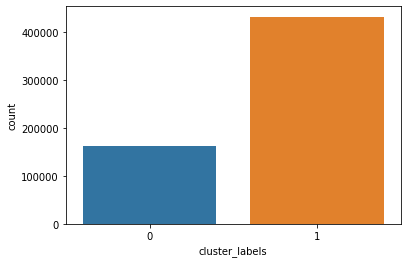

In [11]:
sns.countplot(data=compare, x='cluster_labels')

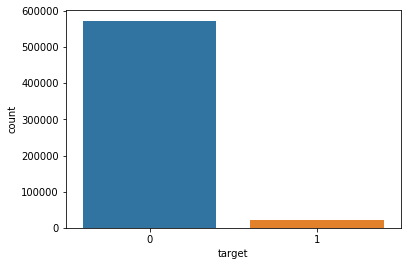

In [12]:
sns.countplot(data=compare, x='target')

In [13]:
compare.cluster_labels.value_counts().sort_index()

0    163101
1    432111
Name: cluster_labels, dtype: int64

In [14]:
pca1 = PCA(n_components=30)
X_new = pca1.fit_transform(scaled_data)
km_new = KMeans(n_clusters=2, random_state=90)
km_new.fit(X_new)

labels = pd.Series(km_new.labels_, name='cluster_labels')
compare_new = pd.concat([porto.target, labels], axis=1)

compare_new.cluster_labels.value_counts().sort_index()

0    172706
1    422506
Name: cluster_labels, dtype: int64

In [15]:
pca1.explained_variance_ratio_

array([0.06357066, 0.04538666, 0.0398383 , 0.03478257, 0.03264027,
       0.03076782, 0.02787508, 0.02419251, 0.02190192, 0.02099226,
       0.01910047, 0.01878097, 0.017765  , 0.01766603, 0.01763847,
       0.01763298, 0.01761033, 0.01759165, 0.01756805, 0.01754985,
       0.01753645, 0.01751456, 0.01748411, 0.01746426, 0.01745354,
       0.01741198, 0.01739483, 0.01735521, 0.01733557, 0.01719612])

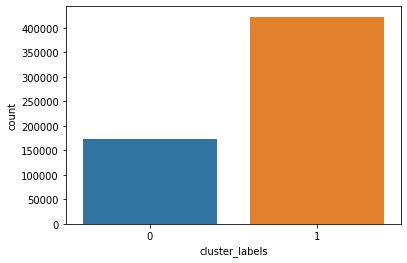

In [16]:
sns.countplot(data=compare_new, x='cluster_labels')

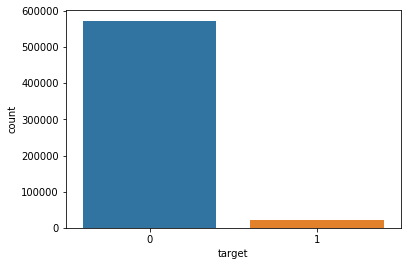

In [17]:
sns.countplot(data=compare_new, x='target')

When PCA(n_components=30) is set, the amount of 0 label is greater than that of 1 label, rather than the opposite when all features are being considered. 

In [18]:
# data only standardized (no PCA)

km1 = KMeans(n_clusters=2, random_state=90)
km1.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=90, tol=0.0001, verbose=0)

In [19]:
labels1 = pd.Series(km1.labels_, name='cluster_labels')
compare1 = pd.concat([porto.target, labels1], axis=1)
compare1.head()

,target,cluster_labels
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1


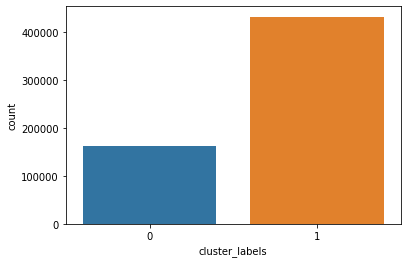

In [20]:
sns.countplot(data=compare1, x='cluster_labels')

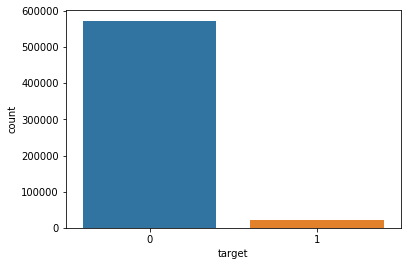

In [21]:
sns.countplot(data=compare1, x='target')

In [22]:
compare1.cluster_labels.value_counts().sort_index()

0    163101
1    432111
Name: cluster_labels, dtype: int64

The results are the same with or without PCA. (with only standardization)

In [23]:
# original dataset (no PCA & no standardization)

km2 = KMeans(n_clusters=2, random_state=90)
km2.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=90, tol=0.0001, verbose=0)

In [24]:
labels2 = pd.Series(km2.labels_, name='cluster_labels')
compare2 = pd.concat([porto.target, labels2], axis=1)
compare2.head()

,target,cluster_labels
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1


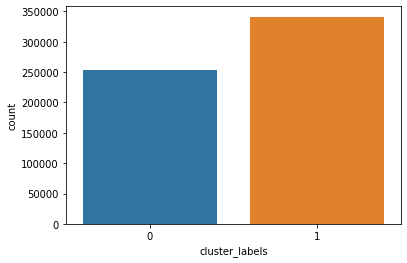

In [25]:
sns.countplot(data=compare2, x='cluster_labels')

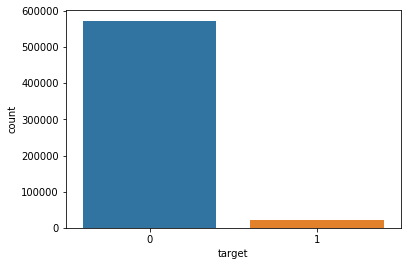

In [26]:
sns.countplot(data=compare2, x='target')

In [27]:
compare2.cluster_labels.value_counts().sort_index()

0    254124
1    341088
Name: cluster_labels, dtype: int64

By using original dataset, the amount of 0 label is less than that of 1 label, but the difference is smaller compared with using PCA and Standardization. 